# Algorithm 2 Data Combiner / Dimension Reducer

In [1]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #Can also try MinMaxScaler or MaxAbsScaler

SETUP

851 patches created with algorithm 2 loaded.
[3.52983905e+04 2.17123391e+04 1.94956053e+04 1.14575531e+04
 1.07356284e+04 9.88632304e+03 9.49886006e+03 8.69140021e+03
 4.83282536e+03 4.18594088e+03 3.95315496e+03 3.68853661e+03
 3.49803896e+03 3.30379626e+03 3.03402818e+03 2.83299916e+03
 2.58153829e+03 2.57300575e+03 2.36967154e+03 2.31487992e+03
 2.05965100e+03 1.89013299e+03 1.80447641e+03 1.71001737e+03
 1.58843235e+03 1.52559239e+03 1.47906611e+03 1.39259628e+03
 1.36323184e+03 1.26071014e+03 1.22527201e+03 1.15674245e+03
 1.11156386e+03 1.08922902e+03 1.06370009e+03 9.63563534e+02
 9.51939304e+02 9.04778159e+02 8.81630272e+02 8.29647893e+02
 7.88788095e+02 7.45352594e+02 7.24482005e+02 7.12546857e+02
 6.91431540e+02 6.78221429e+02 6.52743681e+02 6.41441722e+02
 6.32192071e+02 6.01044180e+02 5.95138240e+02 5.77219592e+02
 5.58451301e+02 5.50408610e+02 5.35611072e+02 5.15723287e+02
 5.00879894e+02 4.73264365e+02 4.57165020e+02 4.47400224e+02
 4.31473088e+02 4.15260816e+02 4.0818867

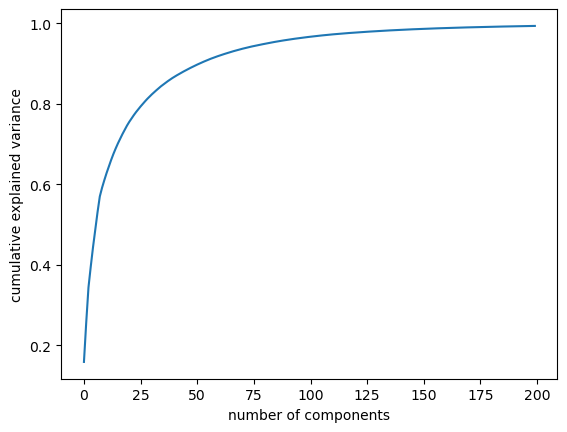

In [2]:
#open directory with the spectrograms and audio data.
used_raw_data = True

os.chdir('..')
os.chdir('./data/')

SampleFeatures = pd.read_csv('SampleSpectra2.csv', index_col = 0)

if used_raw_data:
    SampleWav = pd.read_csv('SampleWav2.csv', index_col = 0)
    SampleFeatures = pd.concat([SampleFeatures, SampleWav], axis = 1, join = 'inner')
    del SampleWav

print(len(SampleFeatures),'patches created with algorithm 2 loaded.')

# Have to rescale before using PCA
scaler = StandardScaler()
SampleFeatures = scaler.fit_transform(SampleFeatures)

# To do: extract vectors of means and stdevs to transform input for prediction later.
# Recall Z-score formula: (x-m)/s. That's exactly what this has done.
os.chdir('..')
os.chdir('./models/')
np.savetxt('mean2.csv',scaler.mean_, delimiter = ',')
np.savetxt('scale2.csv',scaler.scale_, delimiter = ',') #stdev

pca = PCA(n_components = 200) # Has to be <= min(# samples, # features)
pca.fit(SampleFeatures)
ReducedFeatures = pca.transform(SampleFeatures)
print(pca.explained_variance_)
print('reduced shape ', ReducedFeatures.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

SAVING THIS PCA TO DISK

In [3]:
with open('pca2.pkl','wb') as export_file:
    pk.dump(pca, export_file)

# In training script and predictor program, use the following
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload.transform(X)